In [1]:
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
import os
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import statsmodels.api as sm
import statsmodels.formula.api as smf
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
HouseMR2000 = pd.read_excel('Median Rent 2000.xlsx')
HouseMR2000.columns

Index([u'Id2', u'Median Rent 2000'], dtype='object')

In [3]:
HouseMR2013 = pd.read_excel('Median Rent 2013.xlsx')
HouseMR2013.columns

Index([u'Id2', u'Median Rent 2013'], dtype='object')

In [4]:
HouseMR13yr = pd.merge(HouseMR2000, HouseMR2013, on='Id2')

In [5]:
HouseMR13yr.head()

,Id2,Median Rent 2000,Median Rent 2013
0,36005000100,0,NaN
1,36005000200,730,1264
2,36005000400,640,1413
3,36005001600,558,863
4,36005002000,266,472


In [33]:
HouseMR13yr['Pchange'] = (HouseMR13yr['Median Rent 2013']-HouseMR13yr['Median Rent 2000'])/(HouseMR13yr['Median Rent 2000'])

In [34]:
HouseMR13yr.head()

,Id2,Median Rent 2000,Median Rent 2013,Pchange
0,36005000100,0,NaN,NaN
1,36005000200,730,1264,0.731507
2,36005000400,640,1413,1.207812
3,36005001600,558,863,0.546595
4,36005002000,266,472,0.774436


In [35]:
HouseMR13yr.Pchange.describe()

count    1556.000000
mean        0.663059
std         0.416256
min        -0.966017
25%         0.542785
50%         0.678982
75%         0.827248
max         6.393665
Name: Pchange, dtype: float64

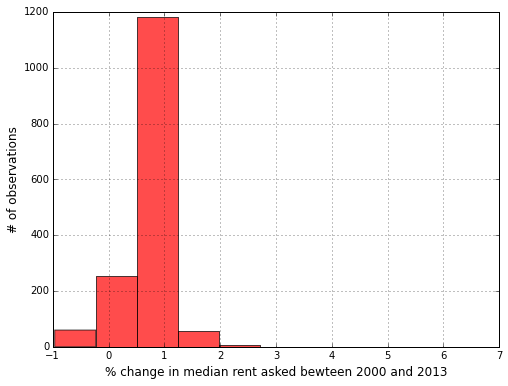

In [36]:
plt.figure(figsize=(8,6))
ax = HouseMR13yr['Pchange'].hist(color='red', alpha=0.7, bins=10)
ax.set_xlabel("% change in median rent asked bewteen 2000 and 2013", fontsize = 12)
ax.set_ylabel("# of observations", fontsize = 12)

In [37]:
HouseMR13yr['Id2'] = HouseMR13yr['Id2'].astype(str)

In [38]:
#HouseMR13yr['Id2'] = HouseMR13yr['Id2'].map(lambda x: str(x)[5:])

In [39]:
HouseMR13yr.head()

,Id2,Median Rent 2000,Median Rent 2013,Pchange
0,36005000100,0,NaN,NaN
1,36005000200,730,1264,0.731507
2,36005000400,640,1413,1.207812
3,36005001600,558,863,0.546595
4,36005002000,266,472,0.774436


In [40]:
writer = pd.ExcelWriter('Change in rent values 2000-2013.xlsx', engine='xlsxwriter')
HouseMR13yr.to_excel(writer, sheet_name='Rent Values', header=True, index=True, startrow=0, startcol=0)

In [41]:
writer.save()

In [56]:
MHValue2000 = pd.read_excel('Median House Value 2000.xlsx')
MHValue2000.columns

Index([u'Id2', u'Median value 2000'], dtype='object')

In [57]:
MHValue2013 = pd.read_excel('Median House Value 2013.xlsx')
MHValue2013.columns

Index([u'Id2', u'Median value 2013'], dtype='object')

In [58]:
HouseMV13yr = pd.merge(MHValue2000, MHValue2013, on='Id2')

In [59]:
HouseMV13yr.head()

,Id2,Median value 2000,Median value 2013
0,36005000100,0,NaN
1,36005000200,167900,418100
2,36005000400,168800,356800
3,36005001600,186800,410300
4,36005002000,211500,371900


In [60]:
HouseMV13yr['Pchange'] = (HouseMV13yr['Median value 2013']-HouseMV13yr['Median value 2000'])/HouseMV13yr['Median value 2000']

In [61]:
HouseMV13yr.head()

,Id2,Median value 2000,Median value 2013,Pchange
0,36005000100,0,NaN,NaN
1,36005000200,167900,418100,1.490173
2,36005000400,168800,356800,1.113744
3,36005001600,186800,410300,1.196467
4,36005002000,211500,371900,0.758392


In [62]:
HouseMV13yr.Pchange.describe()

count    1692.000000
mean             inf
std              NaN
min        -0.835429
25%         1.045726
50%         1.281012
75%         1.604768
max              inf
Name: Pchange, dtype: float64

In [63]:
HouseMV13yr = HouseMV13yr.replace([np.inf, -np.inf], np.nan)

In [64]:
HouseMV13yr.Pchange.describe()

count      1679.000000
mean       1242.879117
std       30074.585054
min          -0.835429
25%           1.043344
50%           1.276701
75%           1.595953
max      978799.000000
Name: Pchange, dtype: float64

In [65]:
HouseMV13yr[HouseMV13yr.Pchange > 12]

,Id2,Median value 2000,Median value 2013,Pchange
666,36047049100,10,397100,39709.000000
1070,36061009600,1,14700,14699.000000
1073,36061009900,1,978800,978799.000000
1076,36061010200,1,588700,588699.000000
1164,36061018400,1,462500,462499.000000
1240,36061029100,12600,283700,21.515873
1724,36081093800,15700,381500,23.299363


In [66]:
HouseMV13yr = HouseMV13yr[HouseMV13yr.Pchange < 12]

In [67]:
HouseMV13yr.Pchange.describe()

count    1672.000000
mean        1.402047
std         0.751059
min        -0.835429
25%         1.040667
50%         1.274155
75%         1.589978
max         9.297391
Name: Pchange, dtype: float64

In [71]:
writer = pd.ExcelWriter('Change in house values 2000-2013.xlsx', engine='xlsxwriter')
HouseMV13yr.to_excel(writer, sheet_name='House Values', header=True, index=True, startrow=0, startcol=0)

In [72]:
writer.save()

In [73]:
HouseMV13yr[HouseMV13yr.Pchange > 6]

,Id2,Median value 2000,Median value 2013,Pchange
94,36005019500,33800,249100,6.369822
549,36047035000,16700,154000,8.221557
713,36047054700,75000,597400,6.965333
1711,36081087100,57500,592100,9.297391
